# Health Analytics - Predict Heart Disease
# Análises de Saúde - Prevsão de Doença de Coração


This is a workflow for various Python-based machine learning model for predicing.

Going to take the following approach:

* Problem definition
* Data
* Evaluation
* Features
* Modelling
* Model Evaluation

Este é um fluxo de trabalho para vários modelos de aprendizado de máquina baseado em Python para previsão.

Vou adotar a seguinte abordagem:

* Definição de problema
* Dados
* Avaliação
* Recursos
* Modelagem
* Avaliação do modelo


##  Problem Definition
Given the set of parameters, can we predict if a person will have heart disease or not?

##  Definição de problema
Dado o conjunto de parâmetros, podemos prever se uma pessoa terá uma doença cardíaca ou não?

## Data (Link dos Dados)

https://www.kaggle.com/dileep070/heart-disease-prediction-using-logistic-regression

## Context
The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.
Variables

## Contexto
O conjunto de dados está disponível publicamente no site Kaggle e é de um estudo cardiovascular em andamento em residentes da cidade de Framingham, Massachusetts. O objetivo da classificação é prever se o paciente tem risco de 10 anos de futura doença cardíaca coronária (CHD). O conjunto de dados fornece as informações dos pacientes. Inclui mais de 4.000 registros e 15 atributos.
Variáveis

## Content
This dataset contains columns: Sex, Age, Patient is Smoker or Not, Cigs Per Day, Use nor Not Use blood pressure medication, Patient had or Not had previously a stroke, Patient was nor Not was hypertensive, Patient had or Not had diabetes, Total Cholesterol Level,
Systolic Blood Pressure, Diastolic Blood Pressure, Body Mass Index, Heart Rate, Glucose Level and 
Predict variable (desired target)
10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)


## Conteúdo
Este conjunto de dados contém colunas: sexo, idade, paciente é fumante ou não, cigarros por dia, uso ou não uso de medicamentos para pressão arterial, paciente teve ou não teve um derrame anterior, paciente não era hipertenso ou não, paciente tinha ou não tinha diabetes, Nível total de colesterol,
Pressão arterial sistólica, pressão arterial diastólica, índice de massa corporal, frequência cardíaca, nível de glicose e
Variável de previsão (alvo desejado)
Risco de 10 anos de doença cardíaca coronária CHD (binário: “1”, significa “Sim”, “0” significa “Não”)

## Inspiration
Answer the following questions would be worthy

* Do Exploratory Data analysis to figure out which variables have a direct and clear impact on 10 year risk of coronary heart disease CHD
* Plot bar charts showing more information about de data
* Plot bar charts showing a correlation between other information and CHD.
* Now build a logistic regression model using variables that were narrowed down in step 1
* Measure the accuracy of the model

# Inspiração
Seria bom responder às seguintes perguntas

* Faça uma análise de dados exploratórios para descobrir quais variáveis têm um impacto direto e claro na retenção de funcionários (ou seja, se eles deixam a empresa ou continuam a trabalhar)
* Plote gráficos de barras mostrando o impacto dos salários dos funcionários na retenção
* Plote gráficos de barras mostrando uma correlação entre o departamento e a retenção de funcionários
* Agora construa um modelo de regressão logística usando variáveis que foram reduzidas na etapa 1
* Meça a precisão do modelo


## Evalutation
Creating a Classification Model mainly Logisitic Regression model (we will also try other model) and to score it by classification metrics to check it's performance## Evaluation Creating a Classification Model mainly Logistic Regression model (we will also try other model) and to score it by classification metrics to check it's performance

## Avaliação 
Criar um modelo de classificação principalmente modelo de regressão logística (também tentaremos outro modelo) e pontuá-lo por métricas de classificação para verificar seu desempenho

## Features
Inputs / Features:
* Sex
* Age
* Current Smoker
* N# Cigarretes Per Day
* Patienr use or not Blood Pressure Medication
* Patient had or not Previously a Stroke
* Patient was or not Hypertensive
* Patient had or not Diabetes 
* Total Cholesterol Level 
* Systolic Blood Pressure 
* Diastolic Blood Pressure
* Body Mass Index 
* Heart Rate
* Glucose level

* Sexo
* Idade
* Fumante Atual
* N # cigarros por dia
* Patienr usa ou não medicação para pressão arterial
* Paciente teve ou não um AVC
* Paciente era ou não hipertenso
* Paciente tinha ou não diabetes
* Nível total de colesterol
* Pressão arterial sistólica
* Pressão sanguínea diastólica
* Índice de massa corporal
* Frequência cardíaca
* Nível de glicose


## Output / label:
* Predict variable (desired target)
10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

Variável de previsão (meta desejada) risco de 10 anos de doença cardíaca coronária CHD (binário: “1”, significa “Sim”, “0” significa “Não”)


### Standard Imports
### Importações Padrão

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as sts
import sklearn as skl
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier, XGBRFClassifier

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve
from sklearn.model_selection import cross_val_score

### Read the CSV 
### Leia o CSV

In [3]:
df = pd.read_csv('data/framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### Data Dictionary

| Information     | Meaning                                                                       |
|-----------------|-------------------------------------------------------------------------------|
| male            | male (1) or female (0)                                                        |
|                 | masculino (1) ou feminino (0)                                                 |
| age             | Age of the patient                                                            |
|                 | Idade do paciente                                                             |
| education       | education level                                                               |
|                 | nível de educação                                                             |
| currentSmoker   | whether or not the patient is a current smoker                                |
|                 | se o paciente é fumante atual ou não                                          |
| cigsPerDay      | the number of cigarettes that the person smoked on average in one day         |
|                 | a quantidade de cigarros que a pessoa fumou em média em um dia                |
| BPMeds          | whether or not the patient was on blood pressure medication                   |
|                 | se o paciente estava ou não tomando medicação para pressão arterial           |
| prevalentStroke | whether or not the patient had previously had a stroke                        |
|                 | se o paciente teve ou não um AVC                                              |
| prevalentHyp    | whether or not the patient was hypertensive                                   |
|                 | se o paciente era hipertenso ou não                                           |
| diabetes        | whether or not the patient had diabetes                                       |
|                 | se o paciente tinha diabetes ou não                                           |
| totChol         | total cholesterol level                                                       |
|                 | nível de colesterol total                                                     |
| sysBP           | systolic blood pressure                                                       |
|                 | pressão arterial sistólica                                                    |
| diaBP           | diastolic blood pressure                                                      |
|                 | pressão sanguínea diastólica                                                  |
| BMI             | Body Mass Index                                                               |
|                 | Índice de massa corporal                                                      |
| heartRate       | heart rate                                                                    |
|                 | frequência cardíaca                                                           |
| glucose         | glucose level                                                                 |
|                 | nível de glicose                                                              |
| TenYearCHD      | 10 year risk of coronary heart disease CHD (“1”, means “Yes”, “0” means “No”) |
|                 | Risco de 10 anos de doença cardíaca coronária CHD ("1", significa "Sim", "0" significa "Não")|
          

## Data Exploration (Exploratory Data Analysis (EDA) )
## Exploração de Dados (Análise Exploratória de Dados (EDA))

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [5]:
df.shape

(4238, 16)

### Generating Some Graphics in order to know more about de data
### Gerando alguns gráficos para saber mais sobre os dados

<AxesSubplot:title={'center':'Count of total Pacients with 10 year risk of coronary heart disease CHD based on Data Provided'}, xlabel='TenYearCHD', ylabel='count'>

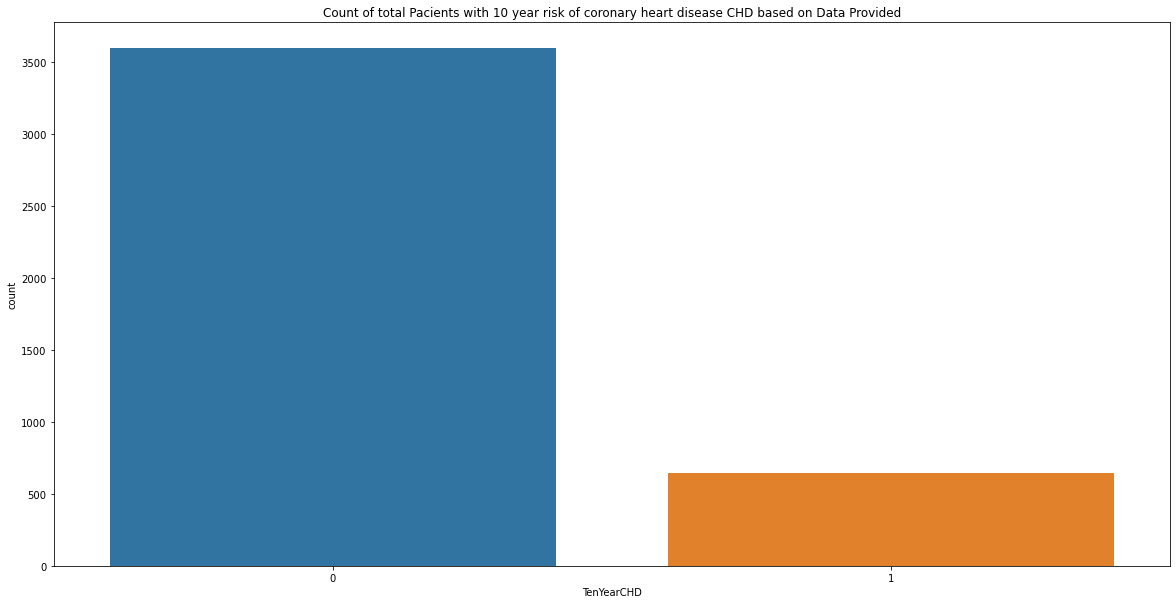

In [6]:
plt.figure(figsize=(20,10))
plt.title('Count of total Pacients with 10 year risk of coronary heart disease CHD based on Data Provided')
sns.countplot(data=df, x='TenYearCHD')

In [ ]:
# ↑↑ Temos um discrepância muito grande nesta informação, que é a variável preditora : Pacientes com 10 anos de risco de doença coronária.
# ↑↑ Possível implementação de oversample,isto é, gerar exemplos do polo positivo. Atualmente tem muitos com Zero que fatalmente o 
# modelo aprenderia mais para 0 (não ter risto), do que para 1 (ter risco) que seria um risco enorme para sensibilidade da 
# informação. Por outro lado, é muito perigoso gerarmos valores aleatórios devido serem dados de saúde. Não implementaremos OverSample

# ↑↑ We have a very large discrepancy in this information, which is the predictor variable: Patients with 10 years of risk for 
# coronary heart disease.
# ↑↑ Possible implementation of oversmple, that is, generate positive pole examples. Currently, there are many with Zero that the 
# model would inevitably learn more to 0 (not having risk), than to 1 (having risk) which would be a huge risk for the sensitivity of 
# the information. On the other hand, it is very dangerous to generate random values because they are health data. We will not 
# implement OverSample

<AxesSubplot:title={'center':'Count of total Pacients had diabetes'}, xlabel='diabetes', ylabel='count'>

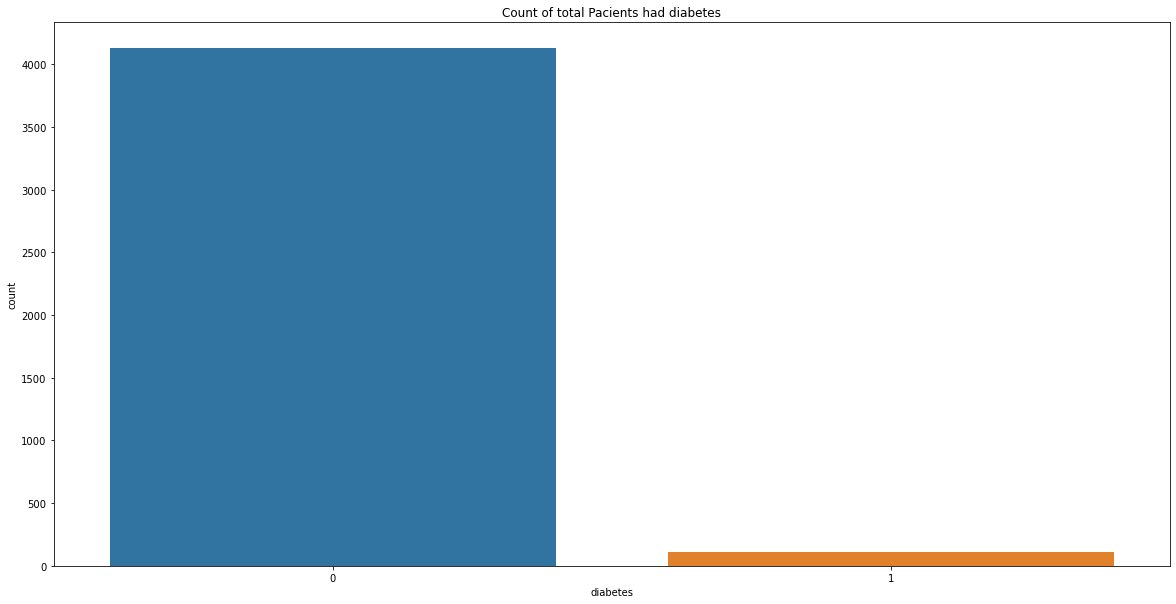

In [7]:
plt.figure(figsize=(20,10))
plt.title('Count of total Pacients had diabetes')
sns.countplot(data=df, x='diabetes')

In [ ]:
# ↑↑ Há mais pacientes sem diabetes do que com.
# ↑↑ There are more patients without diabetes than with.

<AxesSubplot:title={'center':'Count of total Pacients had previously had a stroke'}, xlabel='prevalentStroke', ylabel='count'>

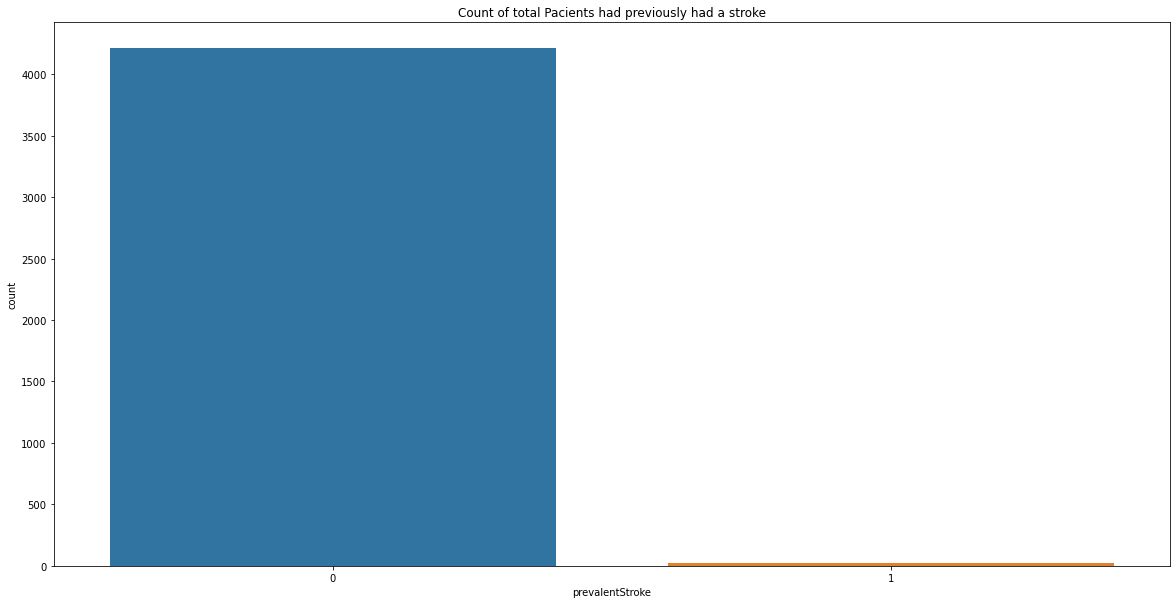

In [8]:
plt.figure(figsize=(20,10))
plt.title('Count of total Pacients had previously had a stroke')
sns.countplot(data=df, x='prevalentStroke')

In [ ]:
# ↑↑ Há um número ínfimo de pacientes que tiveram AVC.
# ↑↑ There are a very small number of patients who have had a stroke.

<AxesSubplot:title={'center':'Count of total Pacients Using Blood pressure medication'}, xlabel='BPMeds', ylabel='count'>

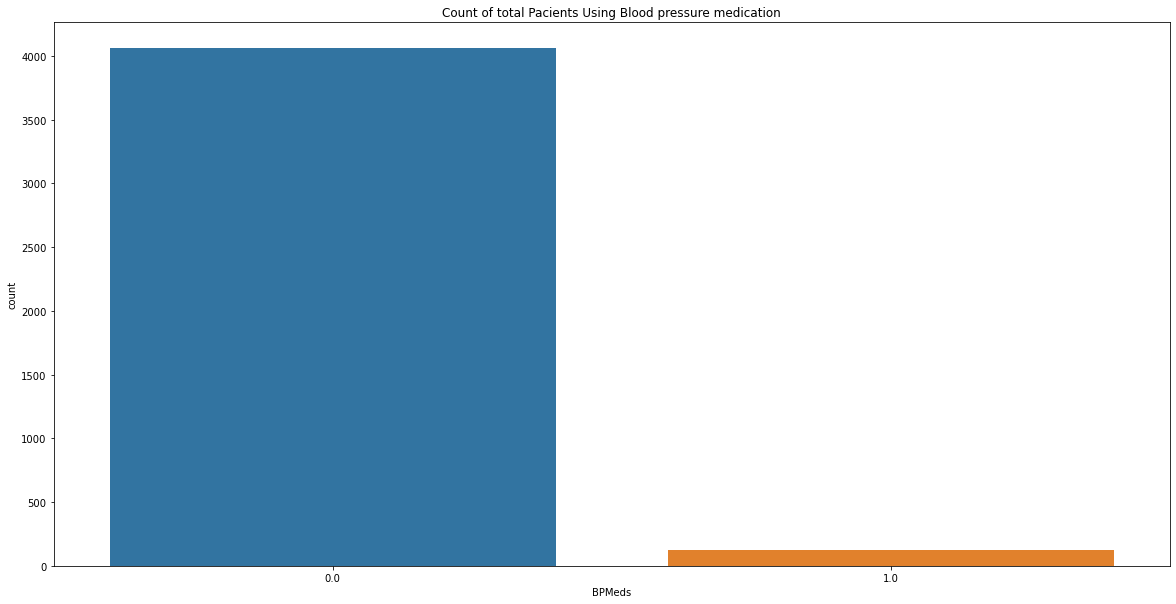

In [9]:
plt.figure(figsize=(20,10))
plt.title('Count of total Pacients Using Blood pressure medication')
sns.countplot(data=df, x='BPMeds')

In [ ]:
# ↑↑ A maioria dos pacientes não usa remédio de controle de pressão arterial.
# ↑↑ Most patients do not use blood pressure medication.

<AxesSubplot:title={'center':'Count of total Smokers Pacients'}, xlabel='currentSmoker', ylabel='count'>

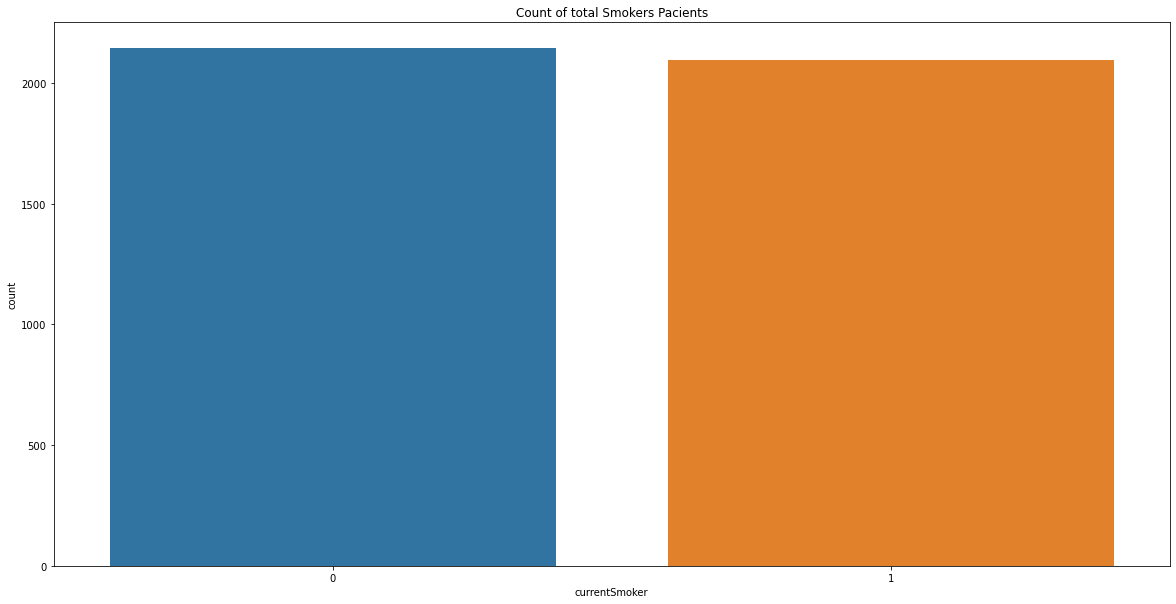

In [10]:
plt.figure(figsize=(20,10))
plt.title('Count of total Smokers Pacients')
sns.countplot(data=df, x='currentSmoker')


In [ ]:
# ↑↑ O número de pacientes fumantes e não fumantes é muito parecido.
# ↑↑ The number of smoking and non-smoking patients is very similar.

<AxesSubplot:title={'center':'Count of total Pacients Per Ages'}, xlabel='age', ylabel='count'>

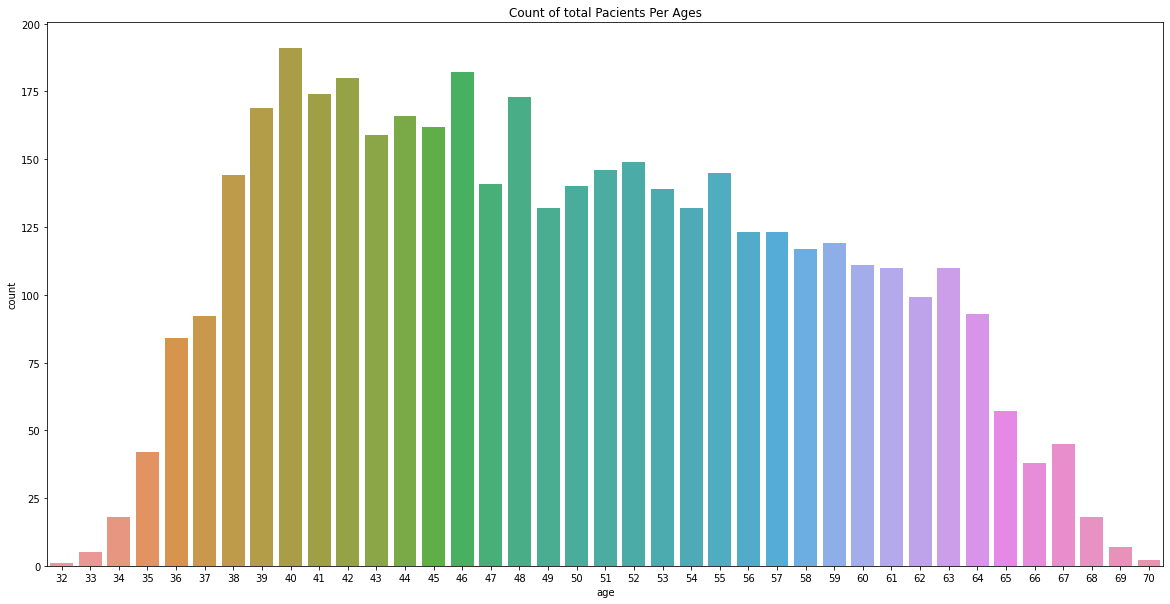

In [11]:
plt.figure(figsize=(20,10))
plt.title('Count of total Pacients Per Ages')
sns.countplot(data=df, x='age')

In [ ]:
# ↑↑ A marioria dos pacientes estão entre 39 e 55 anos!
# ↑↑ Most patients are between 39 and 55 years old!

<AxesSubplot:title={'center':'Count of total Pacient Sex'}, xlabel='male', ylabel='count'>

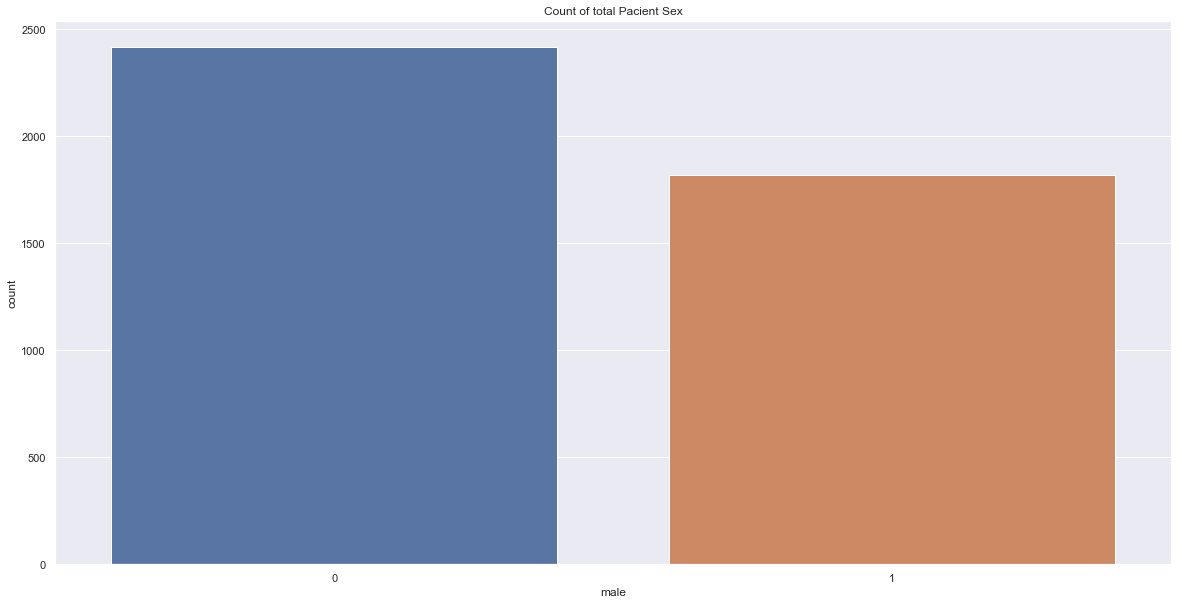

In [40]:
plt.figure(figsize=(20,10))
plt.title('Count of total Pacient Sex')
sns.countplot(data=df, x='male')

In [ ]:
# ↑↑ Temos mais pacientes do sexo feminino que do sexo masculino
# ↑↑ We have more female patients than male patients

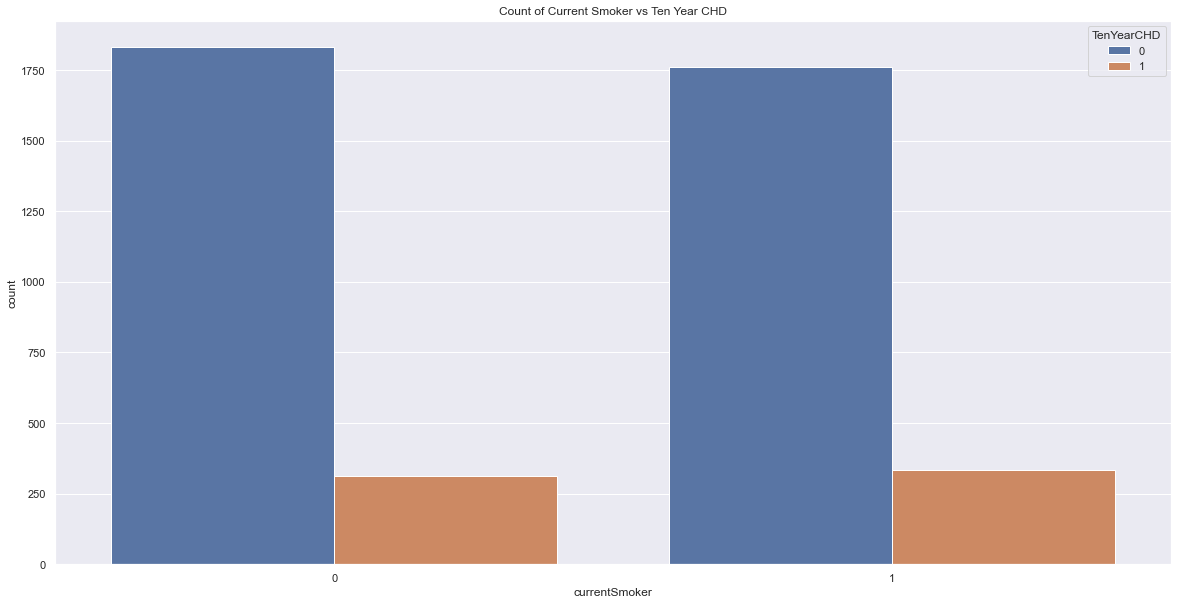

In [38]:
plt.figure(figsize=(20,10))
plt.title('Count of Current Smoker vs Ten Year CHD')
sns.countplot(data=df, x='currentSmoker', hue='TenYearCHD');

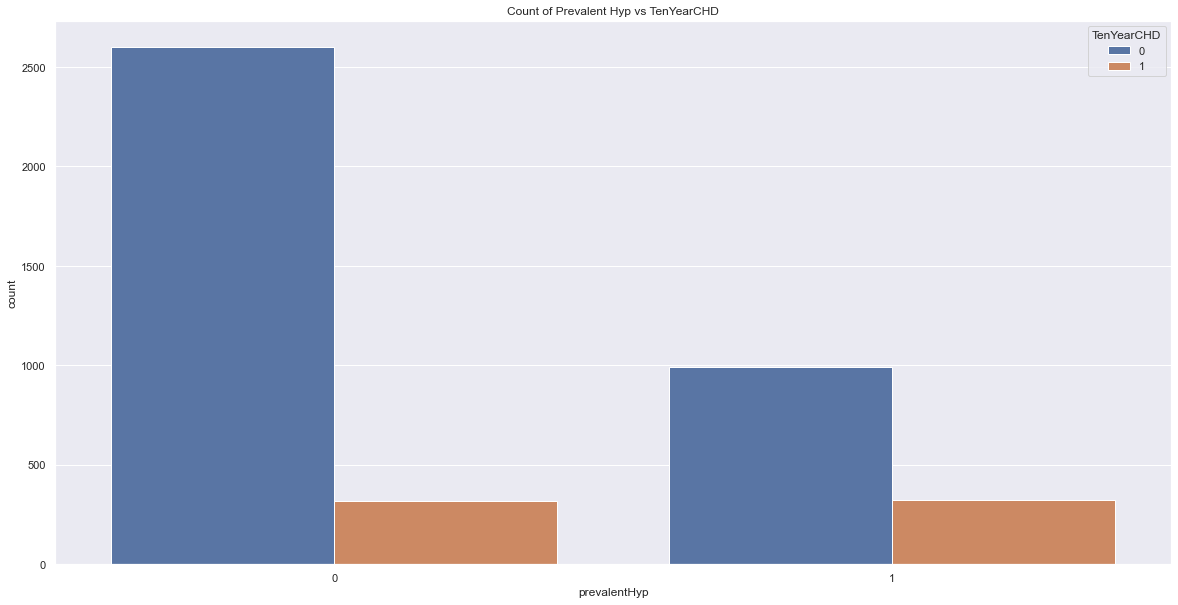

In [37]:
plt.figure(figsize=(20,10))
plt.title('Count of Prevalent Hyp vs TenYearCHD')
sns.countplot(data=df, x='prevalentHyp', hue='TenYearCHD');

### Discovering Missing Values in Data

### Descobrindo valores ausentes nos dados

In [15]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

#### Tratanto Valores Ausentes da columna education

In [16]:
print(df.education.value_counts(),'\n')
# ↑↑ Aparentemente, quase a mentade das observações possui nível 1 na coluna education
# ↑↑ Apparently, almost half of the observations have level 1 in the education column

# ↓↓ Descobrir a Moda da coluna education
# ↓↓ Discover the Moda of the education column
print(df.education.mode(),'\n')

# ↓↓ Preencher os valores ausentes com a Moda da coluna education
# ↓↓ Fill in missing values with Education Column Mode
df.education.fillna(1, inplace=True)

# ↓↓ Checando novamente valores ausentes da coluna
# ↓↓ Checking again for missing values in the column
print(df.education.isna().sum(),'\n')

1.0    1720
2.0    1253
3.0     687
4.0     473
Name: education, dtype: int64 

0    1.0
dtype: float64 

0 



#### Tratanto Valores Ausentes da columna cigsPerDay

In [17]:
# ↓↓ Listing column statistics
# ↓↓ Estatísticas da coluna de listagem
print (df.cigsPerDay.describe(),'\n')

# ↓↓ Filling column values with 9 for missing values
# ↓↓ Preenchendo os valores da coluna com 9 para valores ausentes
df.cigsPerDay.fillna(9, inplace=True)

# ↓↓ Checando novamente valores ausentes da coluna education
print (df.cigsPerDay.isna().sum(),'\n')

count    4209.000000
mean        9.003089
std        11.920094
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        70.000000
Name: cigsPerDay, dtype: float64 

0 



#### Tratanto Valores Ausentes da columna cigsPerDay

In [18]:
# ↓↓ Verificando se existem valores ausentes na coluna
# ↓↓ Checking for missing values in the column
print (df.BPMeds.isna().sum(),'\n')

# ↓↓ Listing column statistics
# ↓↓ Estatísticas da coluna de listagem
print (df.BPMeds.value_counts(),'\n')

# ↓↓ Filling column values with 0 for missing values
df.BPMeds.fillna(0, inplace=True)
# ↑↑ Como é muito risco assumir que pessoa tome remédio de controle pressão e a maioria está com não toma (valor 0), vamos passar os valores ausentes para 0

# ↓↓ Checking again for missing values in the column
# ↓↓ Verificando novamente os valores ausentes na coluna
print (df.BPMeds.isna().sum(),'\n')

53 

0.0    4061
1.0     124
Name: BPMeds, dtype: int64 

0 



#### Tratanto Valores Ausentes da columna totChol

In [19]:
# ↓↓ Listando as estatística da coluna
# ↓↓ Listing column statistics
print(df.totChol.describe(),'\n')
# ↓↓ Preenchendo os valores da coluna com sua média para os valores ausentes
# ↓↓ Filling column values with their mean for missing values
df.totChol.fillna(237, inplace=True)

# ↓↓ Checking for missing values in the column
# ↓↓ Verificando novamente os valores ausentes na coluna
print (df.totChol.isna().sum(),'\n')


count    4188.000000
mean      236.721585
std        44.590334
min       107.000000
25%       206.000000
50%       234.000000
75%       263.000000
max       696.000000
Name: totChol, dtype: float64 

0 



#### Tratanto Valores Ausentes da columna BMI

In [20]:
# ↓↓ Listando as estatística da coluna
# ↓↓ Listing column statistics
print(df.BMI.describe(),'\n')

# ↓↓ Preenchendo os valores da coluna com sua média para os valores ausentes
# ↓↓ Filling column values with their mean for missing values
df.BMI.fillna(25.8, inplace=True)

# ↓↓ Verificando se existem valores ausentes na coluna NOVAMENTE
# ↓↓ Checking again for missing values in the column
print(df.BMI.isna().sum(),'\n')

count    4219.000000
mean       25.802008
std         4.080111
min        15.540000
25%        23.070000
50%        25.400000
75%        28.040000
max        56.800000
Name: BMI, dtype: float64 

0 



In [ ]:
#### Tratanto Valores Ausentes da columna glucose

In [21]:
# ↓↓ Verificando se existem valores ausentes na coluna
# ↓↓ Checking for missing values in the column
print (df.glucose.isna().sum(),'\n')

# ↓↓ Listando as estatística da coluna
# ↓↓ Listing column statistics
print (df.glucose.describe(),'\n')

# ↓↓ Descobrindo a mediana do valores 
# ↓↓ Finding the median value
print (df.glucose.median(),'\n')

# ↓↓ Preenchendo os valores da coluna com sua mediana para os valores ausentes
# ↓↓ Filling column values with their median for missing values
df.glucose.fillna(78,inplace=True)

# ↓↓ Verificando se existem valores ausentes na coluna NOVAMENTE
# ↓↓ Checking again for missing values in the column
print (df.glucose.isna().sum(),'\n')

388 

count    3850.000000
mean       81.966753
std        23.959998
min        40.000000
25%        71.000000
50%        78.000000
75%        87.000000
max       394.000000
Name: glucose, dtype: float64 

78.0 

0 



#### Tratanto Valores Ausentes da columna heartRate

In [22]:
# ↓↓ Verificando se existem valores ausentes na coluna
# ↓↓ Checking for missing values in the column
print (df.heartRate.isna().sum(),'\n')
# ↓↓ Listando as estatística da coluna
# ↓↓ Listing column statistics
print (df.heartRate.describe(),'\n')
# ↓↓ Preenchendo os valores da coluna com sua média para os valores ausentes
# ↓↓ Filling column values with their mean for missing values
df.heartRate.fillna(76, inplace=True)
# ↓↓ Verificando novamente se existem valores ausentes na coluna
# ↓↓ Checking again for missing values in the column
print (df.heartRate.isna().sum(),'\n')

1 

count    4237.000000
mean       75.878924
std        12.026596
min        44.000000
25%        68.000000
50%        75.000000
75%        83.000000
max       143.000000
Name: heartRate, dtype: float64 

0 



In [23]:
# ↓↓ Verificando novamente se existem valores ausentes no dataset
# ↓↓ Checking again for missing values in the dataset
df.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

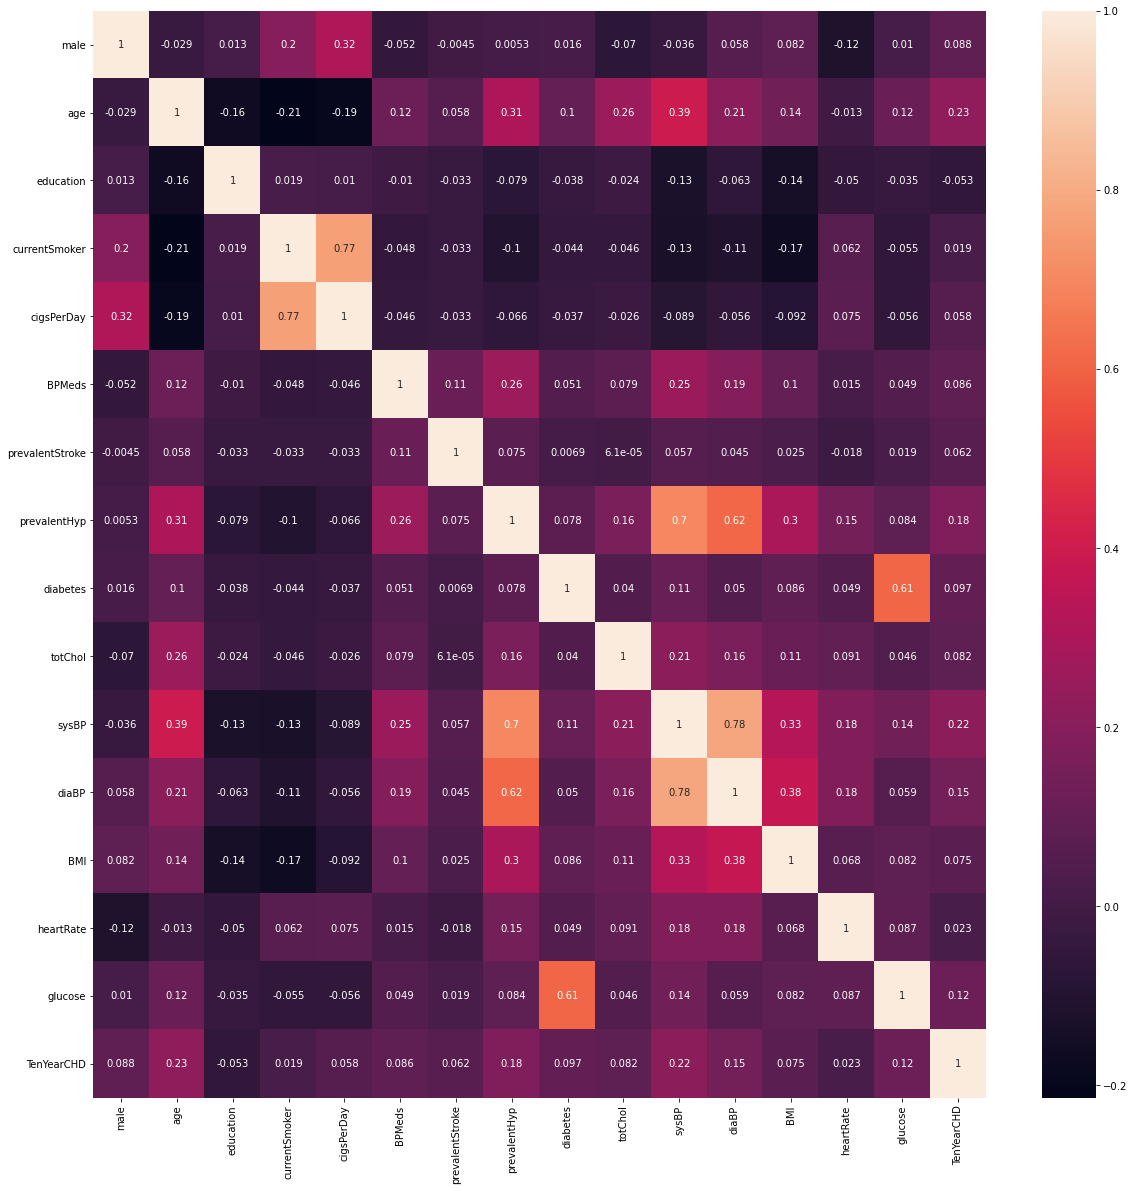

In [24]:
# ↓↓ Gerando um gráfico de HeatMap com valores de correlação entre as colunas
# ↓↓ Generating a HeatMap graph with correlation values between columns
plt.figure(figsize=(20,20))
sns.heatmap(data=df.corr(),annot=True);

In [25]:
# ↓↓ Listar as correlação das todas variáveis independentes em relação a variável Target TenYearCHD em ordem decrescente do valor de correlação.
# ↓↓ List the correlations of all independent variables against the Target variable TenYearCHD in descending order of the correlation value.
df.corr()['TenYearCHD'].sort_values(ascending=False)[:-1]

TenYearCHD         1.000000
age                0.225256
sysBP              0.216429
prevalentHyp       0.177603
diaBP              0.145299
glucose            0.121277
diabetes           0.097317
male               0.088428
BPMeds             0.086417
totChol            0.081630
BMI                0.074678
prevalentStroke    0.061810
cigsPerDay         0.057775
heartRate          0.022903
currentSmoker      0.019456
Name: TenYearCHD, dtype: float64

<AxesSubplot:xlabel='glucose', ylabel='Count'>

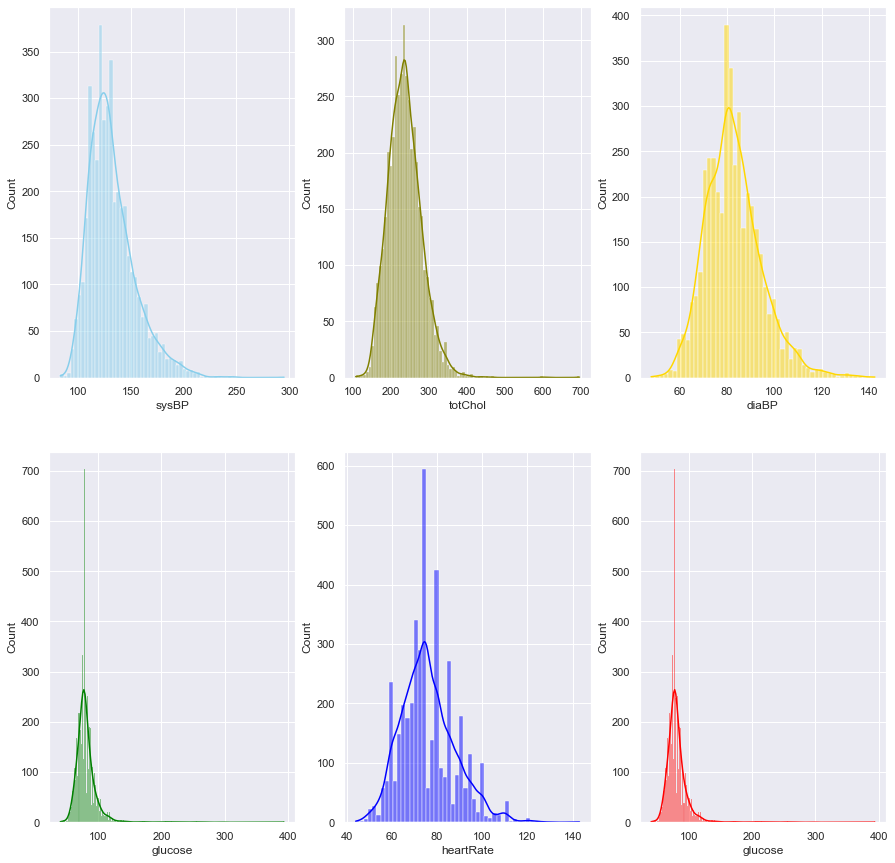

In [26]:
# ↓↓ Gerando histogramas de colunas específicas
# ↓↓ Generating specific column histograms
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 3, figsize=(15, 15))
sns.histplot(data=df, x="sysBP", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="totChol", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x="diaBP", kde=True, color="gold", ax=axs[0, 2])
sns.histplot(data=df, x="glucose", kde=True, color="green", ax=axs[1, 0])
sns.histplot(data=df, x="heartRate", kde=True, color="blue", ax=axs[1, 1])
sns.histplot(data=df, x="glucose", kde=True, color="red", ax=axs[1, 2])


## Modelling
## Modelagem

In [28]:

X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']


In [ ]:
X

In [ ]:
y

In [29]:
# ↓↓ Split dataset in Trainning and Test Parts
# ↓↓ Divida o conjunto de dados nas partes de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [30]:
# ↓↓ Putting the dataset data on the same scale
# ↓↓ Colocando os dados do conjunto de dados na mesma escala
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
# ↓↓ Creanting a Function to Get Each Model Score from a List using DataSet
# ↓↓ Criação de uma função para obter cada pontuação de modelo de uma lista usando DataSet
def fit_and_score(models, X_train, X_test, y_train, y_test):
        
    model_scores = {}
    
    for name, model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test,y_test)

    model_scores = pd.DataFrame(model_scores, index=['Score']).transpose()
    model_scores = model_scores.sort_values('Score')
        
    return model_scores

In [32]:
## ↓↓ Preparing Model List to find the bests
## ↓↓ Preparando a lista de modelos para encontrar os melhores
models = {'LogisticRegression': LogisticRegression(max_iter=10000)
          ,'KNeighborsClassifier': KNeighborsClassifier()
          ,'SVC': SVC()
          ,'DecisionTreeClassifier': DecisionTreeClassifier()
          ,'RandomForestClassifier': RandomForestClassifier()
          ,'AdaBoostClassifier': AdaBoostClassifier()
          ,'GradientBoostingClassifier': GradientBoostingClassifier()
          ,'XGBClassifier': XGBClassifier()
          ,'XGBRFClassifier': XGBRFClassifier()
          }

In [33]:
baseline_model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

C:\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[09:32:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
C:\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your la

In [34]:
# ↓↓ Showing Models and its respectives Scores
# ↓↓ Mostrando modelos e suas respectivas pontuações
baseline_model_scores.sort_values('Score', ascending=False)

,Score
RandomForestClassifier,0.856132
LogisticRegression,0.855346
GradientBoostingClassifier,0.853774
SVC,0.850629
XGBRFClassifier,0.849057
AdaBoostClassifier,0.846698
XGBClassifier,0.838050
KNeighborsClassifier,0.826258
DecisionTreeClassifier,0.763365


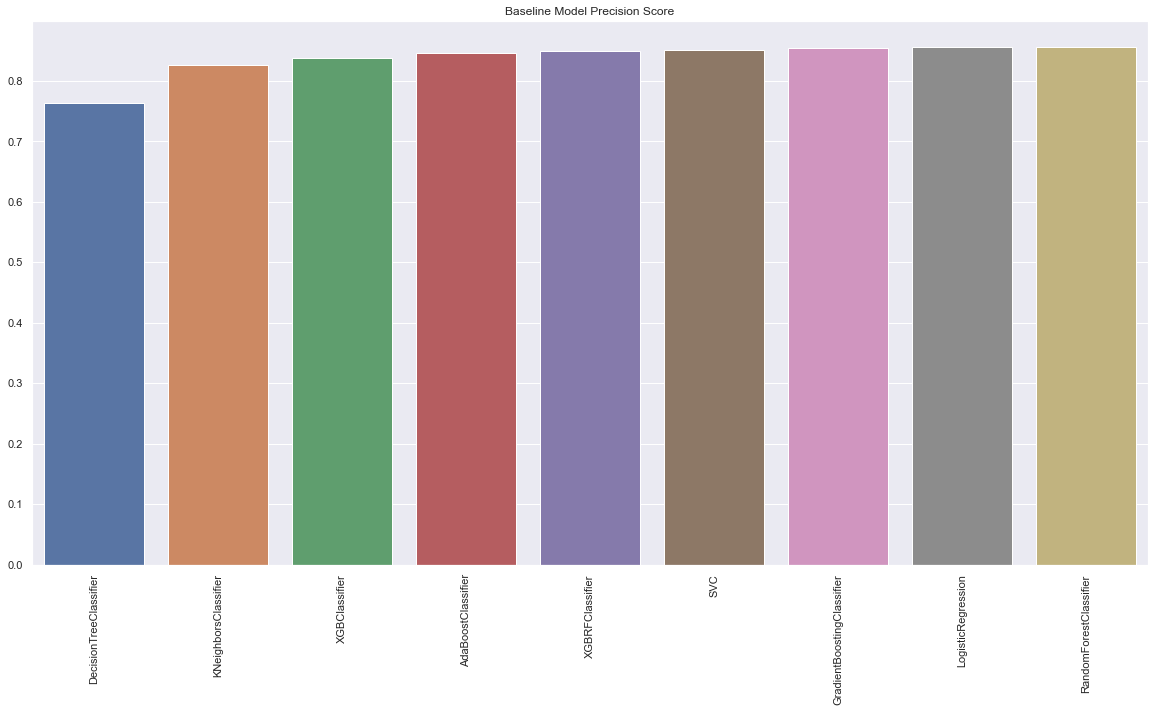

In [35]:
plt.figure(figsize=(20,10))
sns.barplot(data=baseline_model_scores.sort_values('Score').T)
plt.title('Baseline Model Precision Score')
plt.xticks(rotation=90);

We will use the top 3 model to turn the hyperparameters and as in the task, we will also include the logisic Regression to compare the scores

Usaremos os 4 principais modelos para girar os hiperparâmetros e, como na tarefa, também incluiremos a regressão logística para comparar as pontuações

* LogisticRegression - 0.852201
* GradientBoostingClassifier - 	0.847484
* RandomForestClassifier - 0.847484
* SVC - 0.847484

In [19]:
# ↓↓ Creatind a Function to Execute RandomSearchCV
# ↓↓ Criação de uma função para executar RandomSearchCV
def randomsearch_cv_scores(models, params, X_train, X_test, y_train, y_test):
    model_rs_scores = {}
    model_rs_best_param = {}
    
    for name, model in models.items():
        rs_model = RandomizedSearchCV(model
                                     ,param_distributions=params[name]
                                     #,scoring='f1'
                                     ,scoring='accuracy'
                                      ,cv=5                                     
                                     ,n_iter=20
                                     ,n_jobs=-1
                                     ,verbose=2)        
        rs_model.fit(X_train,y_train)
        y_pred = rs_model.predict(X_test)
        model_rs_scores[name] = accuracy_score(y_test,y_pred)
        model_rs_best_param[name] = rs_model.best_params_
        
    return model_rs_scores, model_rs_best_param

In [20]:
# ↓↓ Selecionados os 4 melhores modelos para melhoria de paramêtros
# ↓↓ Selected the 4 best models for parameter improvement
models = {'LogisticRegression' : LogisticRegression()
          ,'GradientBoostingClassifier': GradientBoostingClassifier()
          ,'RandomForestClassifier': RandomForestClassifier()
          ,'SVC': SVC()
          }

In [21]:
## ↓↓ Preparing Parameters for 1st Round Running of RandomSearchCV
## ↓↓ Preparação de parâmetros para a execução da 1ª rodada de RandomSearchCV
params = {'LogisticRegression': {
                                  'C': [0.001,0.01,0.1,1.0,10,100]
                                 ,'penalty': ['none', 'l1', 'l2', 'elasticnet']
                                 ,'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
                                }
          ,'GradientBoostingClassifier' : {'loss': ['deviance', 'exponential'],
                                          'learning_rate': [0.001,0.01,0.1,1.0],
                                          'n_estimators': [20,50,100,200,400],
                                          'criterion': ['friedman_mse', 'mse'],
                                          'max_depth' : [2,3,6,10,20],
                                          'ccp_alpha' : [0.0,0.001,0.01,0.1,1]
                                          }
         ,'RandomForestClassifier': {'n_estimators': [20,50,100,200,400]
                                     ,'criterion': ['gini', 'entropy']
                                     ,'max_depth': [None, 2,10,50,100]
                                     ,'bootstrap': [True, False]
                                     ,'oob_score': [True, False]
                                     ,'ccp_alpha': [0.1,0.01,0.001]
                                     }
          ,'SVC' : {'C': [0.001,0.01,0.1,1.0,10,100]
                                      ,'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
                                      ,'gamma': [1,0.1,0.01,0.001]
                                      }
          }

In [23]:
from datetime import datetime

In [24]:
## ↓↓ Executing the 1st Round to get Best Parameters for each Model Using RandomSearchCV
## ↓↓ Execução da 1ª rodada para obter os melhores parâmetros para cada modelo usando RandomSearchCV

start_time1 = datetime.now()
# do your work here
print(start_time1)
model_rs_scores_1, model_rs_best_param_1 =randomsearch_cv_scores(models, params, X_train, X_test, y_train, y_test)

end_time = datetime.now()

print('Duration: {}'.format(end_time - start_time1))


2021-07-23 15:57:57.828169
Fitting 5 folds for each of 20 candidates, totalling 100 fits
C:\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.84996622 0.85165426 0.85030576 0.85030348 0.85064246 0.85030348
        nan 0.85165426 0.85165426 0.85098029 0.85165426 0.85165426
 0.85165426        nan        nan 0.85165426 0.84996622 0.85165426
        nan 0.85165426]
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
C:\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.84996622 0.84996622 0.84996622 0.84996622 0.84996622 0.84996622
 0.84996622 0.84996622        nan 0.84996622 0.851

In [25]:
## ↓↓ Listing Accuracy for each Model provided by RandomSearchCV - 1st Round
## ↓↓ Listando a Acurácia para cada modelo fornecido por RandomSearchCV - 1ª rodada
model_rs_scores_1

{'LogisticRegression': 0.8545597484276729,
 'GradientBoostingClassifier': 0.8435534591194969,
 'RandomForestClassifier': 0.8498427672955975,
 'SVC': 0.8466981132075472}

In [26]:
## ↓↓ Listing Best Parameters for each Model provided by RandomSearchCV - 1st Round
## ↓↓ Listagem dos melhores parâmetros para cada modelo fornecido por RandomSearchCV - 1ª rodada
model_rs_best_param_2
model_rs_best_param_1

{'LogisticRegression': {'solver': 'newton-cg', 'penalty': 'none', 'C': 0.01},
 'GradientBoostingClassifier': {'n_estimators': 200,
  'max_depth': 10,
  'loss': 'exponential',
  'learning_rate': 0.1,
  'criterion': 'friedman_mse',
  'ccp_alpha': 1},
 'RandomForestClassifier': {'oob_score': True,
  'n_estimators': 200,
  'max_depth': 100,
  'criterion': 'entropy',
  'ccp_alpha': 0.001,
  'bootstrap': True},
 'SVC': {'kernel': 'poly', 'gamma': 0.1, 'C': 0.01}}

In [28]:
## ↓↓ Preparing Parameters for 2nd Round Running of RandomSearchCV with parameters of 1st Round
## ↓↓ Preparação de parâmetros para a execução da 2ª rodada de RandomSearchCV com parâmetros da 1ª rodada
params = {'LogisticRegression': {'C': [0.1,0.2,0.4],
                                 'penalty': ['none'],
                                 'solver': ['newton-cg','lbfgs']},
          'GradientBoostingClassifier' : {'loss': ['exponential'],
                                          'learning_rate': [0.01,0.02,0.05],
                                          'n_estimators': [200,300,400,500],
                                          'criterion': ['friedman_mse'],
                                          'max_depth' : [20,30,40],
                                          'ccp_alpha' : [1,1.5,2]
                                          }
          ,'RandomForestClassifier': {'n_estimators': [200,300,400,500]
                                     ,'criterion': ['entropy']
                                     ,'max_depth': [100,200,500]
                                     ,'bootstrap': [True]
                                     ,'oob_score': [True]
                                     ,'ccp_alpha': [0.001]
                                     }
          ,'SVC' : {'C': [0.1,1.0,10,100]
                                      ,'kernel': ['poly']
                                      ,'gamma': [1,0.1]
                                      }
          }

In [ ]:
from datetime import datetime


In [29]:
## ↓↓ Executing the 2nd Round to get Best Parameters for each Model Using RandomSearchCV
## ↓↓ Execução da 2ª rodada para obter os melhores parâmetros para cada modelo usando RandomSearchCV

start_time1 = datetime.now()
# do your work here
print(start_time1)
model_rs_scores_2, model_rs_best_param_2 = randomsearch_cv_scores(models, params, X_train, X_test, y_train, y_test)

end_time = datetime.now()

print('Duration Scores 2: {}'.format(end_time - start_time1))

2021-07-23 17:30:46.924432
Fitting 5 folds for each of 6 candidates, totalling 30 fits
C:\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 6 is smaller than n_iter=20. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
Fitting 5 folds for each of 20 candidates, totalling 100 fits
C:\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 12 is smaller than n_iter=20. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
Fitting 5 folds for each of 12 candidates, totalling 60 fits
C:\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exh

In [30]:
## ↓↓ Listing Accuracy for each Model provided by RandomSearchCV - 2nd Round
## ↓↓ Listando a Acurácia para cada modelo fornecido por RandomSearchCV - 2ª rodada
model_rs_scores_2

{'LogisticRegression': 0.8545597484276729,
 'GradientBoostingClassifier': 0.8435534591194969,
 'RandomForestClassifier': 0.8474842767295597,
 'SVC': 0.8427672955974843}

In [31]:
## ↓↓ Listing Best Parameters for each Model provided by RandomSearchCV - 2nd Round
## ↓↓ Listagem dos melhores parâmetros para cada modelo fornecido por RandomSearchCV - 2ª rodada
model_rs_best_param_2


{'LogisticRegression': {'solver': 'newton-cg', 'penalty': 'none', 'C': 0.1},
 'GradientBoostingClassifier': {'n_estimators': 500,
  'max_depth': 30,
  'loss': 'exponential',
  'learning_rate': 0.05,
  'criterion': 'friedman_mse',
  'ccp_alpha': 2},
 'RandomForestClassifier': {'oob_score': True,
  'n_estimators': 400,
  'max_depth': 500,
  'criterion': 'entropy',
  'ccp_alpha': 0.001,
  'bootstrap': True},
 'SVC': {'kernel': 'poly', 'gamma': 0.1, 'C': 0.1}}

In [ ]:
# Since LogisticRegression is performing the best we will use that to perfrom a Grid Search to tune it's hyperparams.
# Uma vez que LogisticRegression está tendo o melhor desempenho, usaremos isso para realizar uma pesquisa de grade para ajustar seus hiperparams.

## Grid Search CV

In [75]:
# ↓↓ Creating a Function to call GridSearchCV
# ↓↓ Criação de uma função para chamar GridSearchCV
def gridsearch_cv_scores(models, params, X_train, X_test, y_train, y_test):
        
    model_gs_scores = {}
    model_gs_best_param = {}
    
    for name, model in models.items():
        gs_model = GridSearchCV(model,
                                param_grid=params[name],
                                scoring='accuracy',
                                n_jobs=-1,
                                cv=5,
                                verbose=2)
        
        gs_model.fit(X_train,y_train)
        y_pred = gs_model.predict(X_test)
        model_gs_scores[name] = accuracy_score(y_test,y_pred)
        model_gs_best_param[name] = gs_model.best_params_

    model_gs_scores = pd.DataFrame(model_gs_scores, index=['Accuracy'])
    model_gs_scores = model_gs_scores.transpose().sort_values('Accuracy')
            
    return model_gs_scores, model_gs_best_param

In [76]:
# ↓↓ Preparing variables to call GridSearchCV Function with the best model and its initial best parameters provided by RandomSearchCV
# ↓↓ Preparação de variáveis para chamar a função GridSearchCV com o melhor modelo e seus melhores parâmetros iniciais fornecidos por RandomSearchCV 
models = {'LogisticRegression': LogisticRegression(),
          }

params = {'LogisticRegression': {'C': [0.1,0.2,0.4],
                                 'penalty': ['none'],
                                 'solver': ['newton-cg','lbfgs']
                                }
          }

In [77]:
## ↓↓ Executando a Função que Executa do GridSearchCV 
## ↓↓ Running the GridSearchCV Running Function

start_time1 = datetime.now()

print(start_time1)

model_gs_scores_1, model_gs_best_param_1 = gridsearch_cv_scores(models, params, X_train, X_test, y_train, y_test)

end_time = datetime.now()

print('Duration Grid Search Scores : {}'.format(end_time - start_time1))

2021-07-24 18:02:46.280011
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Duration Grid Search Scores : 0:00:00.278999
C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


In [78]:
# ↓↓ Listing Model Accuracy provided by GridSearchCV
# ↓↓ Listando a Acurácia do Modelo fornecida pelo GridSearchCV
model_gs_scores_1


,Accuracy
LogisticRegression,0.85456


In [74]:
# ↓↓ Lista os melhores parametros encontrados pelo GridSearchCV
# ↓↓ Lists the best parameters found by GridSearchCV
model_gs_best_param_1

{'LogisticRegression': {'C': 0.1, 'penalty': 'none', 'solver': 'newton-cg'}}

In [62]:
# ↓↓ Creating Model based com best parameters provided by GridSearchCV
# ↓↓ Criação de modelo baseado em melhores parâmetros fornecidos por GridSearchCV
model = LogisticRegression(C=0.1, 
                                   penalty='none', 
                                   solver='newton-cg',
                                   max_iter=10000
                                   )
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


In [63]:
# ↓↓ Listando os Scores do Modelo Final com a Função classification_report
# ↓↓ Listing Final Model Scores with the classification_report Function

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1073
           1       0.79      0.10      0.17       199

    accuracy                           0.85      1272
   macro avg       0.82      0.55      0.55      1272
weighted avg       0.85      0.85      0.80      1272



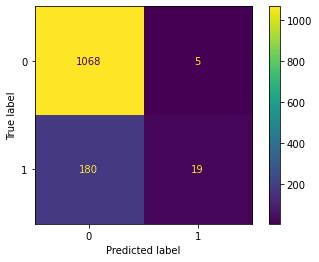

In [64]:
# ↓↓ Plotting Confusion Matrix of Final Model
# ↓↓ Traçando a matriz de confusão do modelo final
plot_confusion_matrix(model, X_test, y_test)

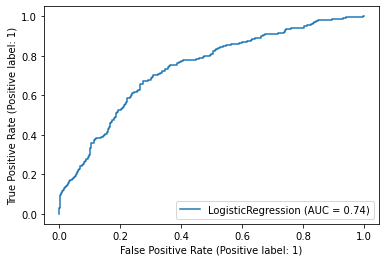

In [65]:
# ↓↓ Ploting ROC Curve of Final Model
# ↓↓ Mostrando  a curva ROC do modelo final
plot_roc_curve(model, X_test, y_test)


## Calculate evalution metrices using cross-validation


In [66]:
# ↓↓ Criando Função do Medir e Pegar os Scores do Modelo Final com a Função cross_val_score
# ↓↓ Creating Measure Function and Get the Final Model Scores with the cross_val_score Function
def get_cv_score(model, X, y, cv=5):
    
    cv_accuracy = cross_val_score(model,X,y,cv=5,
                         scoring='accuracy')
    print(f'Cross Validaion accuracy Scores: {cv_accuracy}')
    print(f'Cross Validation accuracy Mean Score: {cv_accuracy.mean()}')
    
    cv_precision = cross_val_score(model,X,y,cv=5,
                         scoring='precision')
    print(f'Cross Validaion precision Scores: {cv_precision}')
    print(f'Cross Validation precision Mean Score: {cv_precision.mean()}')
    
    cv_recall = cross_val_score(model,X,y,cv=5,
                         scoring='recall')
    print(f'Cross Validaion recall Scores: {cv_recall}')
    print(f'Cross Validation recall Mean Score: {cv_recall.mean()}')
    
    cv_f1 = cross_val_score(model,X,y,cv=5,
                         scoring='f1')
    print(f'Cross Validaion f1 Scores: {cv_f1}')
    print(f'Cross Validation f1 Mean Score: {cv_f1.mean()}')   
    
    cv_merics = pd.DataFrame({'Accuracy': cv_accuracy.mean(),
                         'Precision': cv_precision.mean(),
                         'Recall': cv_recall.mean(),
                         'f1': cv_recall.mean()},index=[0])
    
    return cv_merics

In [67]:
# ↓↓ Pegando dos Scores do Model Final com a Função cross_val_score
# ↓↓ Getting the Final Model Scores with the cross_val_score Function

cv_merics = get_cv_score(model, X, y, cv=5)

C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
Cross Validaion accuracy Scores: [0.85259434 0.85495283 0.85141509 0.85950413 0.85005903]
Cross Validation accuracy Mean Score: 0.8537050856519125
C:\anaconda3\lib\site-p

In [68]:
# ↓↓ Listando os Scores do Modelo Final
# ↓↓ Listing Final Model Scores
cv_merics

,Accuracy,Precision,Recall,f1
0,0.853705,0.665421,0.079203,0.079203


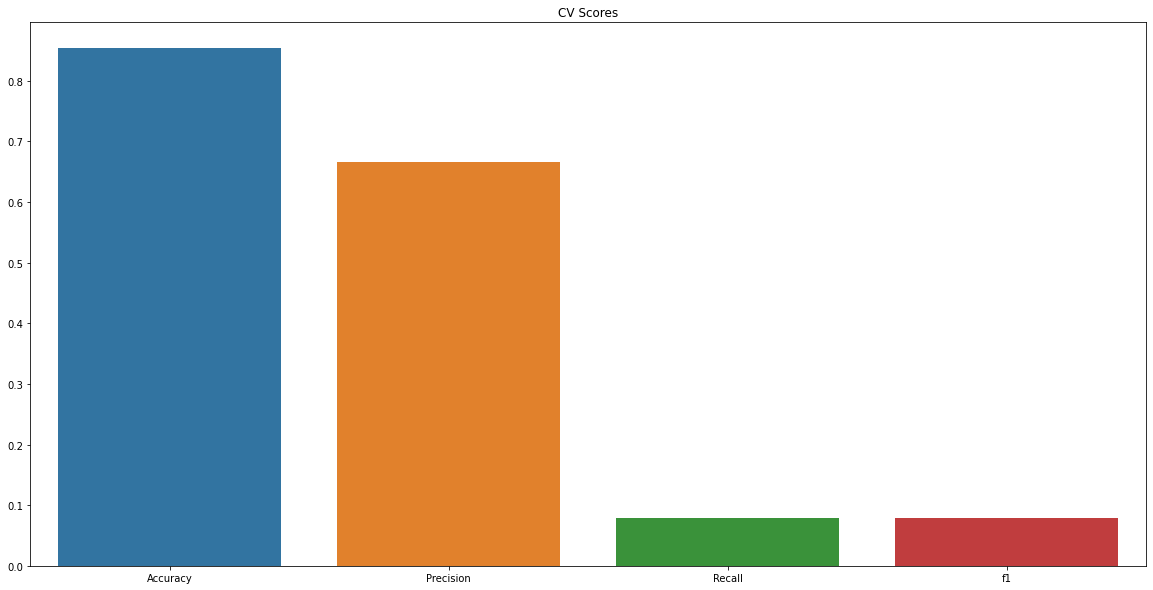

In [69]:
# ↓↓ Ploting com os Scores do Modelo 
# ↓↓ Ploting  with Model Scores

plt.figure(figsize=(20,10))
plt.title('CV Scores')
sns.barplot(data=cv_merics);

### With the Logistic Regression model, we have managed to get scores of:
### Com o modelo de regressão logística, conseguimos obter pontuações de:

* Accuracy: 0.853705
* Precision: 0.665421
* Recall: 0.079203
* f1: 0.079203
